<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica_Final_EDA_WoAns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equipo 6
## Integrantes 

- Javier De La Rosa Mondragón
- Julio Pinzón
- Fernando Merino
- Salomón Rmz

## ¿Qué es el análisis exploratorio de datos?

<font color=red>Es un enfoque para resumir, visualizar y familiarizarse con las características de un conjunto de datos.</font> 

### Valor del análisis de datos exploratorios

El **Análisis Exploratorio de Datos** (<font color=red>EDA</font>) es importante en todos nuestros proyectos de ciencia de datos porque nos permite validar y verificar la información que estamos procesando.

Tener mayor certeza en las relaciones que pudieran existir entre las variables nos puede ayudar a acercarnos a resultados más "certeros", con una mejor interpretación y, en algunas circunstancias, encontrar <font color=blue> información que quizá no era evidente o descubrir que las  que no valía la pena investigar, aportan algo más al proyecto.</font>

Además, se realiza para **definir y refinar** la selección de variables (características) que se utilizarán para el aprendizaje automático. 

### Métodos de análisis exploratorio de datos

Siempre es mejor explorar cada conjunto de datos usando múltiples técnicas exploratorias y comparar los resultados. 

El análisis exploratorio de datos se realiza principalmente utilizando métodos como:

   * *Visualización univariada* — proporciona estadísticas resumidas para cada campo en el conjunto de datos sin procesar
   * *Visualización bivariada* — se realiza para encontrar la relación entre cada variable en el conjunto de datos y la variable objetivo de interés
   * *Visualización multivariada* — se realiza para comprender las interacciones entre diferentes campos en el conjunto de datos
   * *Reducción de dimensionalidad* — ayuda a comprender los campos de los datos que explican la mayor variación entre las observaciones y permiten el procesamiento de un volumen reducido de datos. 

---
---

En resumen

   * Objetivos de la EDA
       * Descubrir patrones
       * Detectar anomalías
       * Planteamiento de las hipótesis
       * Comprobar supuestos

   * Cosas hechas durante EDA
       * Tendencias
       * Distribución
       * Medidas de tendencia central        
       * Medidas de dispersion
       * Correlaciones
       * Evaluación de la hipótesis
       * Exploración visual

# Proyectos

Puntos a cubrir:

El estudiante deberá presentar una notebook limpia con los análisis realizados al conjunto de datos propuesto del módulo 1.

Nota: Aplica de la misma manera si desean utilizar un conjunto diferente de datos. 

Cada sección deberá estar debidamente descrita, así como cada función auxiliar que se emplee en el proceso de análisis: que variables utiliza, que se hace, que retorna.

### Importando las librerías requeridas para EDA

A continuación se encuentran las bibliotecas que se utilizan para realizar EDA (análisis exploratorio de datos) en este ejercicio.

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np
# Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
# Web scraping 
from bs4 import BeautifulSoup

### Cargar los datos

A continuación trabajaremos con un dataset que contiene 800 registros y diferentes características: 5 de tipo categórico y 7 de tipo numérico.

In [2]:
## Lectura de datos
pokemondf = pd.read_csv("../../data/Pokemon.csv")
## Impresion de dimensiones
pokemondf.shape

(800, 13)

Para el siguiente análisis, deberán realizar las siguientes indicaciones:

    1.- Mostrar el tipo de variables que contiene este archivo.
    
    2.- Descartar columnas innecesarias, aquellas que consideren que no aportarán algo especial para el análisis exploratorio.

    3.- Mostrar una tabla de frecuencias de la columna "Generation" y hacer un plot que muestre cada una de ellas. Considerando valores y porcentajes
    
    4.- Realizar un filtro para generar un dataframe a partir de la columna "Generation". 
    
    5.- Buscar elementos duplicados y descartarlos - Podrían utilizar la función ".str.contains()"

In [3]:
# Tipo de variables
pokemondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
# Descarte de columna (s)
pokemondf.drop('#', axis=1, inplace=True)
pokemondf.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

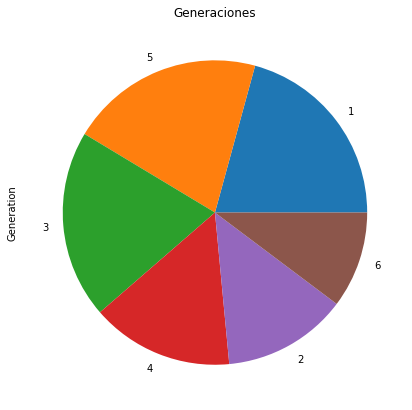

In [5]:
# Tabla de frecuencias con gráfico
plt.figure(figsize=(7,7))
pokemondf.Generation.value_counts().plot.pie(title="Generaciones")
pokemondf.Generation.value_counts()

1    20.750
5    20.625
3    20.000
4    15.125
2    13.250
6    10.250
Name: Generation, dtype: float64

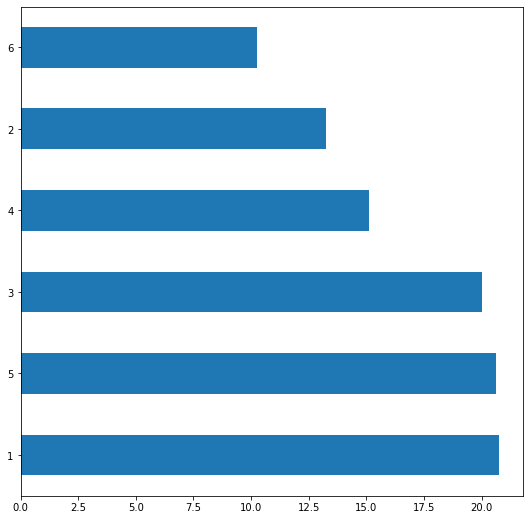

In [6]:
# Tabla de frecuencias relativas con gráfico
#pokemondf.Generation.value_counts().sum()
plt.figure(figsize=(9,9))
(pokemondf.Generation.value_counts()/(len(pokemondf.index))*100)   .plot.barh()
(pokemondf.Generation.value_counts()/(len(pokemondf.index))*100)

In [7]:
# Filtro de columna Generation
gens1and2 = pokemondf[(pokemondf.Generation==1) | (pokemondf.Generation==2)]
print(gens1and2.Generation.value_counts().index.values)
print(gens1and2.shape)

[1 2]
(272, 12)


Posiblemente podamos encontrar repetidos dadas las caracteristicas de algunos de los datos que tenemos en este conjunto... podemos usar la función pd.duplicated() para hacer la comprobación.

In [8]:
# Sección auxiliar...
print('Hay  0 nombres duplicados en el dataset, debe ser algo más...')
print('Número de numbres únicos:',len(pokemondf['Name'].unique()))
print('Aha! Necesitamos eliminar a los que tienen "MEGA" en su nombre. Vamos a quitarlos')

Hay  0 nombres duplicados en el dataset, debe ser algo más...
Número de numbres únicos: 800
Aha! Necesitamos eliminar a los que tienen "MEGA" en su nombre. Vamos a quitarlos


Filtremos aquellos que tienen palabras extra...

In [9]:
# Elementos duplicados y descarte
#gens1and2[pokemondf.Name.str.contains('Mega')]
mega_filter = (gens1and2.Name.str.contains('Mega '))
gens1and2 = gens1and2[~mega_filter]
#gens1and2.Generation.value_counts()
print(gens1and2.groupby('Generation').size() ,'\nOk vamos bien!')



Generation
1    151
2    100
dtype: int64 
Ok vamos bien!


¡Bien!, En este momento deberíamos tener 251 elementos en nuestro dataframe. ahora realizaremos un análisis exploratorio general del mismo para entender mediante estadística y visualización, el comportamiento de los mismos.

### Atributos del dataset y cómo se relacionan entre sí

Como tenemos 251 elementos y 6 atributos para cada uno de ellos, analizaremos cómo se relacionan entre sí.

![img](https://www.centropkmn.com/wp-content/uploads/2016/07/cpokemon.com_entrenamiento_extremo-749x450.jpg)

¿Los Pokémon con mayor defensa también tienen un mayor ataque? ¿Los Pokémon rápidos también son buenos defensivamente?

Con ese fin, usaremos un par de cuadrículas de Seaborn. Es una cuadrícula bastante personalizable donde puede mapear diferentes tipos de gráficos en el triángulo superior, triángulo inferior y ejes diagonales.
La figura producida tiene tres secciones:

    Triángulo superior -> Diagrama de dispersión para cada pokemon  (diagrama de dispersión SCATTERPLOT de Seaborn)
    Diagonal -> Gráfico de densidad de kernel para cada atributo (Seabon KDEPLOT)
    Triángulo inferior -> Gráfico de dispersión con un ajuste de modelo de regresión lineal (gráfico REGPLOT de Seaborn)

/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; s

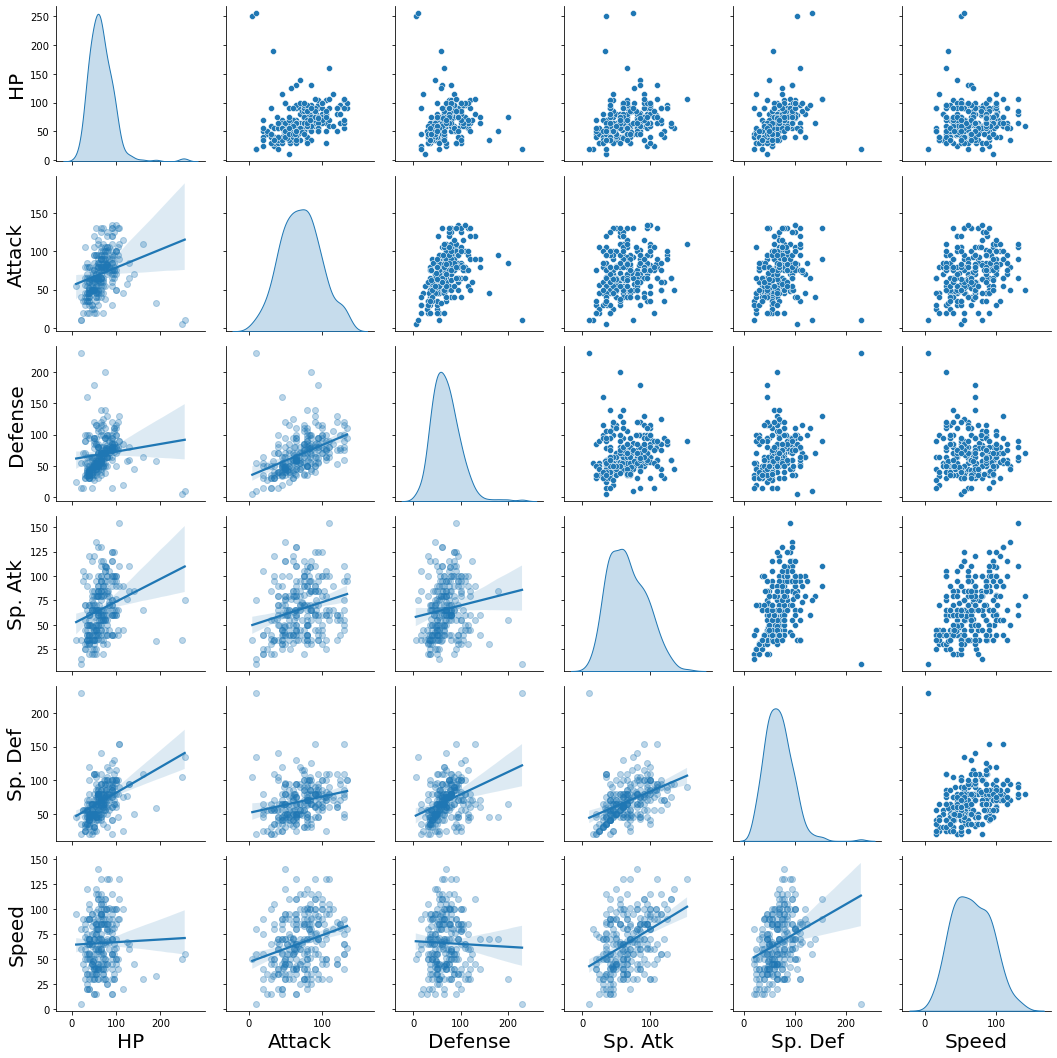

In [10]:
def my_pairgrid(gens1and2):
    plt.rcParams["axes.labelsize"] = 20
    g = sns.PairGrid(gens1and2, vars=['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'])
    g = g.map_diag(sns.kdeplot, shade=True)
    g = g.map_lower(sns.regplot, scatter_kws={'alpha':0.3})
    g = g.map_upper(sns.scatterplot)
    return(g)
_ = my_pairgrid(gens1and2)

### Correlación entre atributos

Si bien el primer gráfico fue útil, quizás una mejor manera de visualizar la correlación entre atributos es un mapa de calor con un azul más fuerte que indica una correlación más alta.

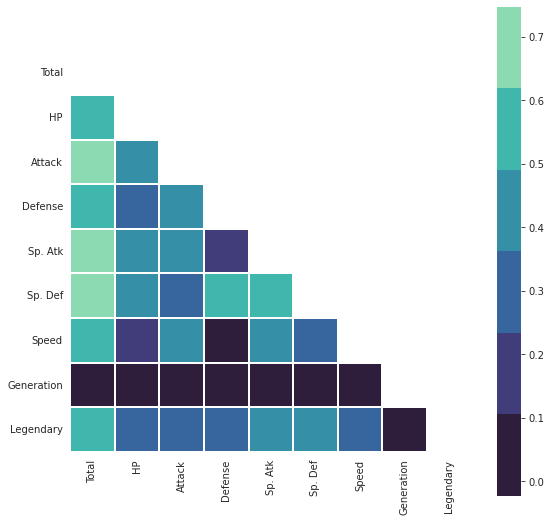

In [11]:
# Corr de todo el dataset (todas las generaciones)
plt.figure(figsize=(9,9))
my_corr = pokemondf.corr() 
mask = np.zeros_like(my_corr) 
## Esta parte es para llenar la diagonal superior de espacios en blanco!
mask[np.triu_indices_from(mask)] = True 
with sns.axes_style("white"):
     ax = sns.heatmap(my_corr, mask=mask, square=True, cmap=sns.color_palette('mako'), vmax=np.max(np.sort(my_corr.values)[:,-2]), linewidths=0.3)

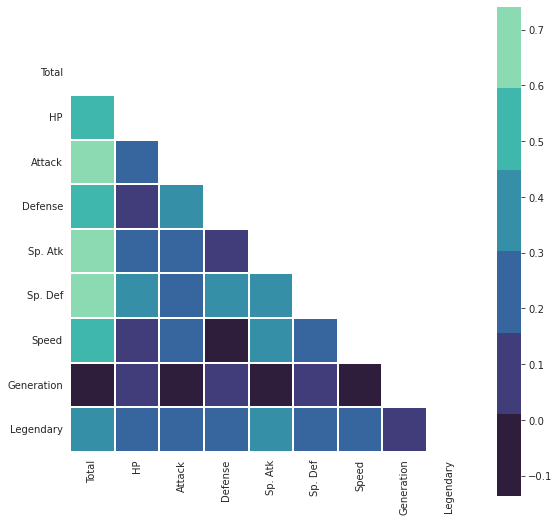

In [12]:
# Corr de gens 1 y 2
plt.figure(figsize=(9,9))
my_corr = gens1and2.corr() 
mask = np.zeros_like(my_corr) 
## Esta parte es para llenar la diagonal superior de espacios en blanco!
mask[np.triu_indices_from(mask)] = True 
with sns.axes_style("white"):
     ax = sns.heatmap(my_corr, mask=mask, square=True, cmap=sns.color_palette('mako'), vmax=np.max(np.sort(my_corr.values)[:,-2]), linewidths=0.3)

# Análisis de atributos y tipos

Hagamos un análisis de cómo los atributos varían con el tipo.
Mi primera idea fue usar un Seaborn scatterplot ya que no tenemos tantos datos que puedan saturar la imagen.

Asignar quien es x, y, data y hue al usar el método de sns.scatterplot() y colocar el título adecuadamente

/tmp/ipykernel_141070/4118451010.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  a = sns.scatterplot(data=gens1and2[(gens1and2.Generation==1)], x="HP", y="Type 1", alpha=.7, palette="muted",s=70)
/tmp/ipykernel_141070/4118451010.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  b = sns.scatterplot(data=gens1and2[(gens1and2.Generation==2)], x="HP", y="Type 1", alpha=.7, palette="muted",s=70)


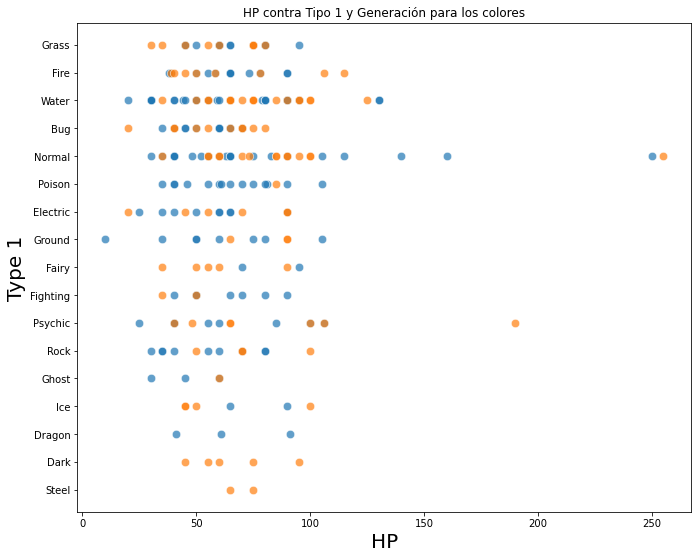

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
266,Pupitar,Rock,Ground,410,70,84,70,65,70,51,2,False
267,Tyranitar,Rock,Dark,600,100,134,110,95,100,61,2,False
269,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
270,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True


In [13]:
fig = plt.figure(figsize=(11,9))
#plt.rcParams["font.size"] = 25
#a = sns.scatterplot(data=gens1and2[(gens1and2.Generation==1)], x="HP", y="Type 1", alpha=.7, palette="muted",s=70, hue='Generation')
#b = sns.scatterplot(data=gens1and2[(gens1and2.Generation==2)], x="HP", y="Type 1", alpha=.7, palette="muted",s=70, hue='Generation')
a = sns.scatterplot(data=gens1and2[(gens1and2.Generation==1)], x="HP", y="Type 1", alpha=.7, palette="muted",s=70)
b = sns.scatterplot(data=gens1and2[(gens1and2.Generation==2)], x="HP", y="Type 1", alpha=.7, palette="muted",s=70)
a.set_title('HP contra Tipo 1 y Generación para los colores')
plt.show()
gens1and2

Además de los valores atípicos, vamos a transformar el tipo "Fairy" a "Normal", por cuestiones de practicidad. En ambas columnas "Type 1" y "Type 2"

In [14]:
# Cambiar valores en las dos columnas solicitadas
gens1and2.loc[ (gens1and2['Type 1']=='Fairy') | (gens1and2['Type 2']=='Fairy'), ['Type 1','Type 2'] ] = 'Normal'
gens1and2.loc[ (gens1and2['Type 1']=='Fairy') | (gens1and2['Type 2']=='Fairy') ]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


<Figure size 720x720 with 0 Axes>

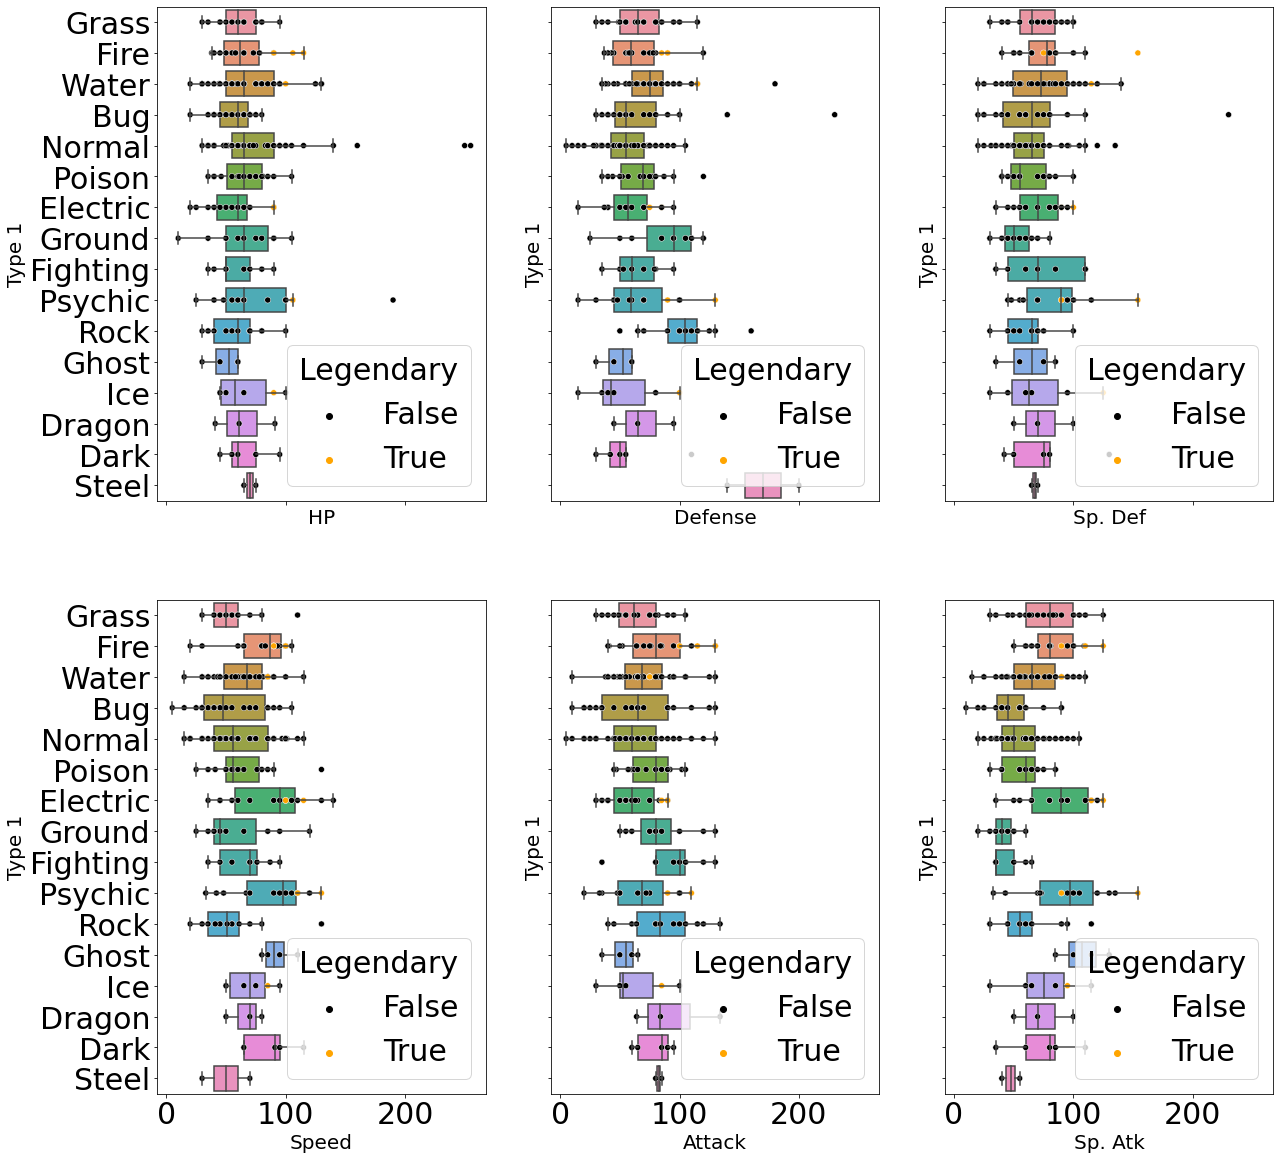

In [15]:
#Completa la función y trata de describir lo que hace
def attr_per_type(input_df, y_attr, hue_attr,type_number):
    fig = plt.figure(figsize=(10,10))
    plt.rcParams["font.size"] = 30
    f, axes = plt.subplots(2, 3, figsize=(20, 20), sharey=True, sharex=True)
    poke_attributes = input_df[y_attr]
    counter = 0
    for row in range(2):
        for col in range(3):
            sns.boxplot(y = type_number, x = y_attr[counter], data=input_df, ax=axes[row, col], showfliers=False)
            sns.scatterplot(y=type_number, x=y_attr[counter], data=input_df, ax=axes[row, col], hue=hue_attr, palette=['black', 'orange'])

            counter += 1
            #if (col == 0):
            #    axes[row, col].yaxis.label.set_visible(False)
            #    continue
            #axes[row, col].yaxis.set_visible(False)
    return(f, axes)
                        
# Manda a llamar la funcion con el dataframe correspondiente y las columnas tipos y legendario
(f, axes) = attr_per_type(gens1and2, ['HP','Defense','Sp. Def','Speed','Attack','Sp. Atk'], 'Legendary','Type 1')
plt.show()

<Figure size 720x720 with 0 Axes>

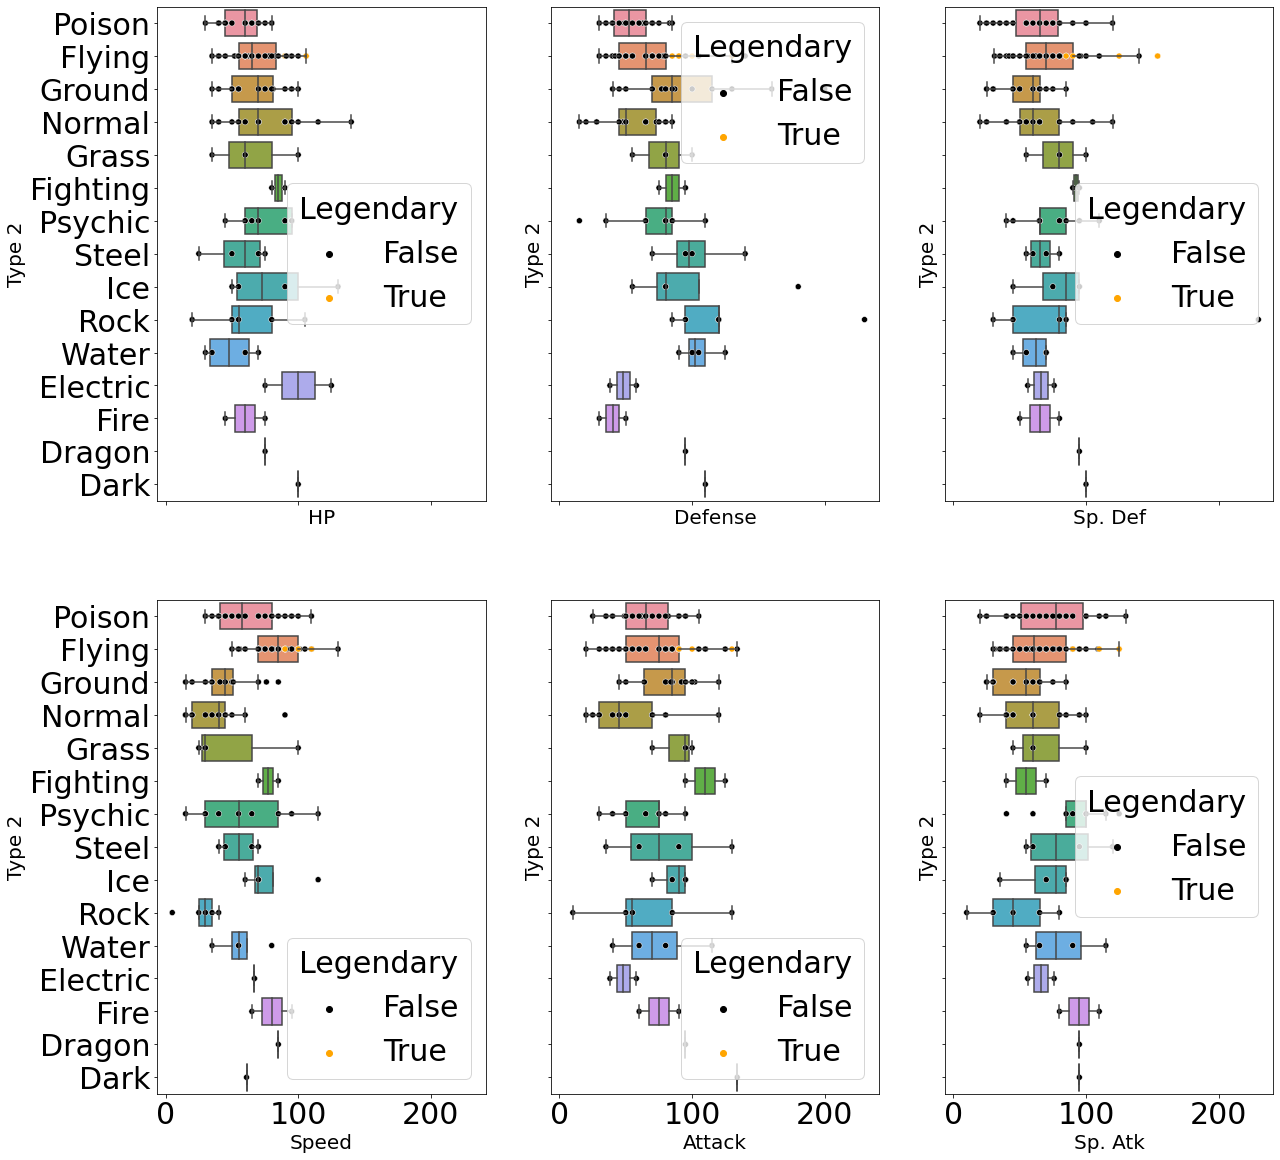

In [16]:
(f, axes) = attr_per_type(gens1and2, ['HP','Defense','Sp. Def','Speed','Attack','Sp. Atk'], 'Legendary','Type 2')
plt.show()

Muy bien, esto se ve mucho mejor! El problema con el conjunto de datos actual es que incluye Pokémon de menor evolución. Por ejemplo, Charmander, Charmeleon y Charizard están todos incluidos. Preferiría que solo se incluyera el último Pokémon de evolución porque la selección se realiza principalmente en función de esos. Tratemos de solucionar este problema raspando el árbol de evolución de Pokémon del sitio web de pokemondb. 


Voy a desglosar cada paso para que sea más comprensible.
---

### Web scraping para mejorar nuestro conjunto de datos

**Paso 1: encontrar la URL**

El sitio web que elegí es el sitio web de pokemondb que enumera las evoluciones de todos los Pokémon en esta forma:

![img](https://i.postimg.cc/qR8yX0qW/Pika.png)

In [17]:
poke_url = 'https://pokemondb.net/evolution#evo-g2'
#Hacer el get y el parseo correspondiente
from bs4 import BeautifulSoup
import requests
pdb_response = requests.get(poke_url)
pdb_response

<Response [200]>

**Paso 2: examinar el HTML de la página y extraer los datos**

Ahora que tenemos el HTML, tenemos que examinar dónde se encuentra exactamente la información que queremos. Podemos utilizar las herramientas de desarrollo de Google Chrome para ver qué parte del árbol HTML nos interesa. Usaremos el método de find_all.

![img](https://i.postimg.cc/qRf8WwFf/Pika-HTML.png)

In [18]:
html_soup = BeautifulSoup(pdb_response.text, 'html.parser')
infocards = html_soup.find_all("div", {"class":"infocard-list-evo"})
infocards[0]

<div class="infocard-list-evo"><div class="infocard"><span class="infocard-lg-img"><a href="/pokedex/bulbasaur"><span class="img-fixed img-sprite" data-alt="Bulbasaur sprite" data-avif="https://img.pokemondb.net/sprites/home/normal/2x/avif/bulbasaur.avif" data-src="https://img.pokemondb.net/sprites/home/normal/2x/bulbasaur.jpg"></span></a></span><span class="infocard-lg-data text-muted"><small>#0001</small><br/> <a class="ent-name" href="/pokedex/bulbasaur">Bulbasaur</a><br/> <small><a class="itype grass" href="/type/grass">Grass</a> · <a class="itype poison" href="/type/poison">Poison</a></small></span></div>
<span class="infocard infocard-arrow"><i class="icon-arrow icon-arrow-e"></i><small>(Level 16)</small></span><div class="infocard"><span class="infocard-lg-img"><a href="/pokedex/ivysaur"><span class="img-fixed img-sprite" data-alt="Ivysaur sprite" data-avif="https://img.pokemondb.net/sprites/home/normal/2x/avif/ivysaur.avif" data-src="https://img.pokemondb.net/sprites/home/norma

**Paso 3: localizar y extraer toda la información útil en el HTML**

Ahora que hemos seleccionado todos los divs, necesitamos extraer la información que nos sea útil. Me gustaría obtener la siguiente información:

    La evolución es el pokemon (1º, 2º, etc.)
    El número de Pokémon (lo necesitaremos en el futuro para filtrar)
    El texto pequeño debajo del pokemon (nuevamente, esto se usará para filtrar)
    El nombre de pokemon

Toda la información que queremos se puede encontrar en el intervalo con la clase 'infocard-lg-data text-muted' como se puede ver en la captura de pantalla a continuación:

![img](https://i.postimg.cc/yxh1vgJp/Info-Pic.png)

Solo necesitamos extraer el primer pequeño (número de pokemon), el segundo pequeño (nombre de pokemon) y la etiqueta a con la clase 'ent-name' que tiene el texto pequeño debajo del pokemon.

También utilizo enumerate para crear un índice de la evolución del pokemon. Entonces, por ejemplo, en los casos simples (Charmander -> Charmeleon -> Charizard) con enumerate logro darle a Charmander el número 1, Charmeleon el número 2 y Charizard el número 3.

Desafortunadamente, esto falla estrepitosamente para los casos complejos (como el de Pikatchu) pero trataremos esto en un paso posterior.

In [19]:
raw = []
for chain in infocards:
    raw.append(([(i, x.find('small').getText(), 
                  x.find_all('small')[1].getText(), 
                  x.find('a', {'class':'ent-name'}).getText()) for i, x in enumerate(list(chain.find_all('span', {'class':'infocard-lg-data text-muted'})), 1)]))

raw[:4] 

[[(1, '#0001', 'Grass · Poison', 'Bulbasaur'),
  (2, '#0002', 'Grass · Poison', 'Ivysaur'),
  (3, '#0003', 'Grass · Poison', 'Venusaur')],
 [(1, '#0004', 'Fire', 'Charmander'),
  (2, '#0005', 'Fire', 'Charmeleon'),
  (3, '#0006', 'Fire · Flying', 'Charizard')],
 [(1, '#0007', 'Water', 'Squirtle'),
  (2, '#0008', 'Water', 'Wartortle'),
  (3, '#0009', 'Water', 'Blastoise')],
 [(1, '#0010', 'Bug', 'Caterpie'),
  (2, '#0011', 'Bug', 'Metapod'),
  (3, '#0012', 'Bug · Flying', 'Butterfree')]]

**Paso 4: limpieza del conjunto de datos**

Ahora que hemos extraído los datos, definitivamente necesitamos hacer algunos filtros:

    Eliminar todos los Pokémon que tienen 'alolan' en su nombre, ya que son de generaciones más nuevas, supongo.
    Elimina todos los Pokémon con un número superior a 251, ya que estos son nuevamente de generaciones más nuevas.
    Elimine todas las entradas restantes que tengan 1 o menos entradas de la lista

In [20]:
raw[7]


[(1, '#0019', 'Alolan Rattata', 'Rattata'),
 (2, '#0020', 'Alolan Raticate', 'Raticate')]

In [21]:
#Eliminar todas las tuplas que contienen "Alol" en el texto 
step_1 = [[elem for elem in branch_list if 'Alol' not in elem[2]] for branch_list in raw]

step_1

[[(1, '#0001', 'Grass · Poison', 'Bulbasaur'),
  (2, '#0002', 'Grass · Poison', 'Ivysaur'),
  (3, '#0003', 'Grass · Poison', 'Venusaur')],
 [(1, '#0004', 'Fire', 'Charmander'),
  (2, '#0005', 'Fire', 'Charmeleon'),
  (3, '#0006', 'Fire · Flying', 'Charizard')],
 [(1, '#0007', 'Water', 'Squirtle'),
  (2, '#0008', 'Water', 'Wartortle'),
  (3, '#0009', 'Water', 'Blastoise')],
 [(1, '#0010', 'Bug', 'Caterpie'),
  (2, '#0011', 'Bug', 'Metapod'),
  (3, '#0012', 'Bug · Flying', 'Butterfree')],
 [(1, '#0013', 'Bug · Poison', 'Weedle'),
  (2, '#0014', 'Bug · Poison', 'Kakuna'),
  (3, '#0015', 'Bug · Poison', 'Beedrill')],
 [(1, '#0016', 'Normal · Flying', 'Pidgey'),
  (2, '#0017', 'Normal · Flying', 'Pidgeotto'),
  (3, '#0018', 'Normal · Flying', 'Pidgeot')],
 [(1, '#0019', 'Normal', 'Rattata'), (2, '#0020', 'Normal', 'Raticate')],
 [],
 [(1, '#0021', 'Normal · Flying', 'Spearow'),
  (2, '#0022', 'Normal · Flying', 'Fearow')],
 [(1, '#0023', 'Poison', 'Ekans'), (2, '#0024', 'Poison', 'Arbok')],

In [22]:
#Remueve todos los pokemon que son mayores a la generacion 2 (N > 251) 
step_2 = [ [elem for elem in branch_list if int(elem[1][1:]) <= 251] for branch_list in raw ] 

step_2

[[(1, '#0001', 'Grass · Poison', 'Bulbasaur'),
  (2, '#0002', 'Grass · Poison', 'Ivysaur'),
  (3, '#0003', 'Grass · Poison', 'Venusaur')],
 [(1, '#0004', 'Fire', 'Charmander'),
  (2, '#0005', 'Fire', 'Charmeleon'),
  (3, '#0006', 'Fire · Flying', 'Charizard')],
 [(1, '#0007', 'Water', 'Squirtle'),
  (2, '#0008', 'Water', 'Wartortle'),
  (3, '#0009', 'Water', 'Blastoise')],
 [(1, '#0010', 'Bug', 'Caterpie'),
  (2, '#0011', 'Bug', 'Metapod'),
  (3, '#0012', 'Bug · Flying', 'Butterfree')],
 [(1, '#0013', 'Bug · Poison', 'Weedle'),
  (2, '#0014', 'Bug · Poison', 'Kakuna'),
  (3, '#0015', 'Bug · Poison', 'Beedrill')],
 [(1, '#0016', 'Normal · Flying', 'Pidgey'),
  (2, '#0017', 'Normal · Flying', 'Pidgeotto'),
  (3, '#0018', 'Normal · Flying', 'Pidgeot')],
 [(1, '#0019', 'Normal', 'Rattata'), (2, '#0020', 'Normal', 'Raticate')],
 [(1, '#0019', 'Alolan Rattata', 'Rattata'),
  (2, '#0020', 'Alolan Raticate', 'Raticate')],
 [(1, '#0021', 'Normal · Flying', 'Spearow'),
  (2, '#0022', 'Normal · F

In [24]:
#Remuever las entradas que no tengan información de step_2, las entradas que necesitamos son 
#mayores a 1, tomando el tamaño len() de cada elemento examinado.

step_1 = [[elem for elem in branch_list if 'Alol' not in elem[2]] for branch_list in raw]
step_2 = [ [elem for elem in branch_list if int(elem[1][1:]) <= 251] for branch_list in step_2 ] 
step_3 = [elem for elem in step_2 if len(elem) > 1] 
step_3

[[(1, '#0001', 'Grass · Poison', 'Bulbasaur'),
  (2, '#0002', 'Grass · Poison', 'Ivysaur'),
  (3, '#0003', 'Grass · Poison', 'Venusaur')],
 [(1, '#0004', 'Fire', 'Charmander'),
  (2, '#0005', 'Fire', 'Charmeleon'),
  (3, '#0006', 'Fire · Flying', 'Charizard')],
 [(1, '#0007', 'Water', 'Squirtle'),
  (2, '#0008', 'Water', 'Wartortle'),
  (3, '#0009', 'Water', 'Blastoise')],
 [(1, '#0010', 'Bug', 'Caterpie'),
  (2, '#0011', 'Bug', 'Metapod'),
  (3, '#0012', 'Bug · Flying', 'Butterfree')],
 [(1, '#0013', 'Bug · Poison', 'Weedle'),
  (2, '#0014', 'Bug · Poison', 'Kakuna'),
  (3, '#0015', 'Bug · Poison', 'Beedrill')],
 [(1, '#0016', 'Normal · Flying', 'Pidgey'),
  (2, '#0017', 'Normal · Flying', 'Pidgeotto'),
  (3, '#0018', 'Normal · Flying', 'Pidgeot')],
 [(1, '#0019', 'Normal', 'Rattata'), (2, '#0020', 'Normal', 'Raticate')],
 [(1, '#0019', 'Alolan Rattata', 'Rattata'),
  (2, '#0020', 'Alolan Raticate', 'Raticate')],
 [(1, '#0021', 'Normal · Flying', 'Spearow'),
  (2, '#0022', 'Normal · F

**Paso 5: mejorar nuestro conjunto de datos existente**

Para el análisis me gustaría poder decir qué Pokémon son la última evolución de cada aarreglo y qué Pokémon no tienen evolución (y por lo tanto no se incluyeron en la lista en absoluto). 

* Por ejemplo: Charmander es el primero en el árbol de evolución Charmander-Charmeleon-Charizard y me gustaría excluirlo del análisis. Snorlax por otro lado no tiene evolución y me gustaría incluirlo en el análisis.

Por tanto, me gustaría crear 2 listas, una con todos los pokémon que pertenecen a una rama de evolución y otra con pokémon que son los últimos de una rama de evolución.


In [25]:
#Extraer todos los pokemon de la lista step_3
# has_evolution = [[elem[3] for elem in branch_list ] for branch_list in step_3] 
has_evolution = [[elem[3] for elem in branch_list[:-1] ]  for branch_list in step_3 ] 
has_evolution

[['Bulbasaur', 'Ivysaur'],
 ['Charmander', 'Charmeleon'],
 ['Squirtle', 'Wartortle'],
 ['Caterpie', 'Metapod'],
 ['Weedle', 'Kakuna'],
 ['Pidgey', 'Pidgeotto'],
 ['Rattata'],
 ['Rattata'],
 ['Spearow'],
 ['Ekans'],
 ['Pichu', 'Pikachu', 'Raichu'],
 ['Sandshrew'],
 ['Sandshrew'],
 ['Nidoran♀', 'Nidorina'],
 ['Nidoran♂', 'Nidorino'],
 ['Cleffa', 'Clefairy'],
 ['Vulpix'],
 ['Vulpix'],
 ['Igglybuff', 'Jigglypuff'],
 ['Zubat', 'Golbat'],
 ['Oddish', 'Gloom', 'Vileplume'],
 ['Paras'],
 ['Venonat'],
 ['Diglett'],
 ['Diglett'],
 ['Meowth'],
 ['Meowth'],
 ['Psyduck'],
 ['Mankey'],
 ['Growlithe'],
 ['Growlithe'],
 ['Poliwag', 'Poliwhirl', 'Poliwrath'],
 ['Abra', 'Kadabra'],
 ['Machop', 'Machoke'],
 ['Bellsprout', 'Weepinbell'],
 ['Tentacool'],
 ['Geodude', 'Graveler'],
 ['Geodude', 'Graveler'],
 ['Ponyta'],
 ['Ponyta'],
 ['Slowpoke', 'Slowbro'],
 ['Slowpoke', 'Slowbro'],
 ['Magnemite'],
 ['Doduo'],
 ['Seel'],
 ['Grimer'],
 ['Grimer'],
 ['Shellder'],
 ['Gastly', 'Haunter'],
 ['Onix'],
 ['Drowzee'

In [ ]:
#Transformar la lista anterior en un arreglo de 1 dimension

# equipo: cómo se haría con dos for anidados:

#one_dim_names = []
#for evolution in has_evolution:
#   for pokemon in evolution:
#        one_dim_names.append(pokemon)
#has_evolution = one_dim_names      
        

In [ ]:
# equipo: ahoira con una list comprehension:

#Transformar la lista anterior en un arreglo de 1 dimension

#one_dim_names = [   p for evo in has_evolution for p in evo ]
#has_evolution = one_dim_names


In [26]:
#Transformar la lista anterior en un arreglo de 1 dimension

# equipo: ahora con sum:
one_dim_names = sum(has_evolution, [])
has_evolution = one_dim_names
has_evolution

['Bulbasaur',
 'Ivysaur',
 'Charmander',
 'Charmeleon',
 'Squirtle',
 'Wartortle',
 'Caterpie',
 'Metapod',
 'Weedle',
 'Kakuna',
 'Pidgey',
 'Pidgeotto',
 'Rattata',
 'Rattata',
 'Spearow',
 'Ekans',
 'Pichu',
 'Pikachu',
 'Raichu',
 'Sandshrew',
 'Sandshrew',
 'Nidoran♀',
 'Nidorina',
 'Nidoran♂',
 'Nidorino',
 'Cleffa',
 'Clefairy',
 'Vulpix',
 'Vulpix',
 'Igglybuff',
 'Jigglypuff',
 'Zubat',
 'Golbat',
 'Oddish',
 'Gloom',
 'Vileplume',
 'Paras',
 'Venonat',
 'Diglett',
 'Diglett',
 'Meowth',
 'Meowth',
 'Psyduck',
 'Mankey',
 'Growlithe',
 'Growlithe',
 'Poliwag',
 'Poliwhirl',
 'Poliwrath',
 'Abra',
 'Kadabra',
 'Machop',
 'Machoke',
 'Bellsprout',
 'Weepinbell',
 'Tentacool',
 'Geodude',
 'Graveler',
 'Geodude',
 'Graveler',
 'Ponyta',
 'Ponyta',
 'Slowpoke',
 'Slowbro',
 'Slowpoke',
 'Slowbro',
 'Magnemite',
 'Doduo',
 'Seel',
 'Grimer',
 'Grimer',
 'Shellder',
 'Gastly',
 'Haunter',
 'Onix',
 'Drowzee',
 'Krabby',
 'Voltorb',
 'Voltorb',
 'Exeggcute',
 'Exeggutor',
 'Cubone',


In [27]:
#Tomar la última entrada de la lista
last_evolutions  = [x[-1] for x in step_3] 
last_evolutions

[(3, '#0003', 'Grass · Poison', 'Venusaur'),
 (3, '#0006', 'Fire · Flying', 'Charizard'),
 (3, '#0009', 'Water', 'Blastoise'),
 (3, '#0012', 'Bug · Flying', 'Butterfree'),
 (3, '#0015', 'Bug · Poison', 'Beedrill'),
 (3, '#0018', 'Normal · Flying', 'Pidgeot'),
 (2, '#0020', 'Normal', 'Raticate'),
 (2, '#0020', 'Alolan Raticate', 'Raticate'),
 (2, '#0022', 'Normal · Flying', 'Fearow'),
 (2, '#0024', 'Poison', 'Arbok'),
 (4, '#0026', 'Alolan Raichu', 'Raichu'),
 (2, '#0028', 'Ground', 'Sandslash'),
 (2, '#0028', 'Alolan Sandslash', 'Sandslash'),
 (3, '#0031', 'Poison · Ground', 'Nidoqueen'),
 (3, '#0034', 'Poison · Ground', 'Nidoking'),
 (3, '#0036', 'Fairy', 'Clefable'),
 (2, '#0038', 'Fire', 'Ninetales'),
 (2, '#0038', 'Alolan Ninetales', 'Ninetales'),
 (3, '#0040', 'Normal · Fairy', 'Wigglytuff'),
 (3, '#0169', 'Poison · Flying', 'Crobat'),
 (4, '#0182', 'Grass', 'Bellossom'),
 (2, '#0047', 'Bug · Grass', 'Parasect'),
 (2, '#0049', 'Bug · Poison', 'Venomoth'),
 (2, '#0051', 'Ground', '

In [28]:
#Aquellos que tienen 2 evoluciones finales (Politoed y Poliwrath, por ejemplo)
last_evolutions.extend([x[-2] for x in step_3 if x[-1][0] == 4])
last_evolutions

[(3, '#0003', 'Grass · Poison', 'Venusaur'),
 (3, '#0006', 'Fire · Flying', 'Charizard'),
 (3, '#0009', 'Water', 'Blastoise'),
 (3, '#0012', 'Bug · Flying', 'Butterfree'),
 (3, '#0015', 'Bug · Poison', 'Beedrill'),
 (3, '#0018', 'Normal · Flying', 'Pidgeot'),
 (2, '#0020', 'Normal', 'Raticate'),
 (2, '#0020', 'Alolan Raticate', 'Raticate'),
 (2, '#0022', 'Normal · Flying', 'Fearow'),
 (2, '#0024', 'Poison', 'Arbok'),
 (4, '#0026', 'Alolan Raichu', 'Raichu'),
 (2, '#0028', 'Ground', 'Sandslash'),
 (2, '#0028', 'Alolan Sandslash', 'Sandslash'),
 (3, '#0031', 'Poison · Ground', 'Nidoqueen'),
 (3, '#0034', 'Poison · Ground', 'Nidoking'),
 (3, '#0036', 'Fairy', 'Clefable'),
 (2, '#0038', 'Fire', 'Ninetales'),
 (2, '#0038', 'Alolan Ninetales', 'Ninetales'),
 (3, '#0040', 'Normal · Fairy', 'Wigglytuff'),
 (3, '#0169', 'Poison · Flying', 'Crobat'),
 (4, '#0182', 'Grass', 'Bellossom'),
 (2, '#0047', 'Bug · Grass', 'Parasect'),
 (2, '#0049', 'Bug · Poison', 'Venomoth'),
 (2, '#0051', 'Ground', '

In [29]:
#Hay algunos elementos que tienen multiples entradas
eevee_and_hitmon = [x[1:] for x in step_3 if (x[0][3] == 'Tyrogue') or (x[0][3] ==  'Eevee')]
eevee_and_hitmon = sum(eevee_and_hitmon, [])
last_evolutions.extend(eevee_and_hitmon)

#Se remueven algunos duplicados
last_evo_df = pd.DataFrame([[int(x[1][1:]), x[3]] for x in last_evolutions], columns=['Number', 'Pokemon'] )
last_evo_df = last_evo_df.drop_duplicates() 
last_evo_df.shape

(95, 2)

Estamos al final del proceso, tenemos una lista de Pokémon que pertenecen a una rama de evolución y también tenemos una lista de Pokémon que son las últimas evoluciones. Sigamos adelante y actualicemos nuestro conjunto de datos inicial. Crearemos dos columnas adicionales.

In [30]:
my_pokemon = gens1and2.copy()

my_pokemon['Has_evol'] = my_pokemon.Name.isin(has_evolution)
my_pokemon['Last_evol'] = my_pokemon.Name.isin(last_evo_df.Pokemon)
my_evolved_pokemon = my_pokemon.loc[(my_pokemon.Last_evol == True) | (my_pokemon.Has_evol == False)].copy()

In [31]:
my_pokemon[['Name','Has_evol','Last_evol']]

,Name,Has_evol,Last_evol
0,Bulbasaur,True,False
1,Ivysaur,True,False
2,Venusaur,False,True
4,Charmander,True,False
5,Charmeleon,True,False
...,...,...,...
266,Pupitar,True,False
267,Tyranitar,False,True
269,Lugia,False,False
270,Ho-oh,False,False


In [32]:
#my_pokemon.to_csv('out')
my_evolved_pokemon.shape

(137, 14)

<Figure size 720x720 with 0 Axes>

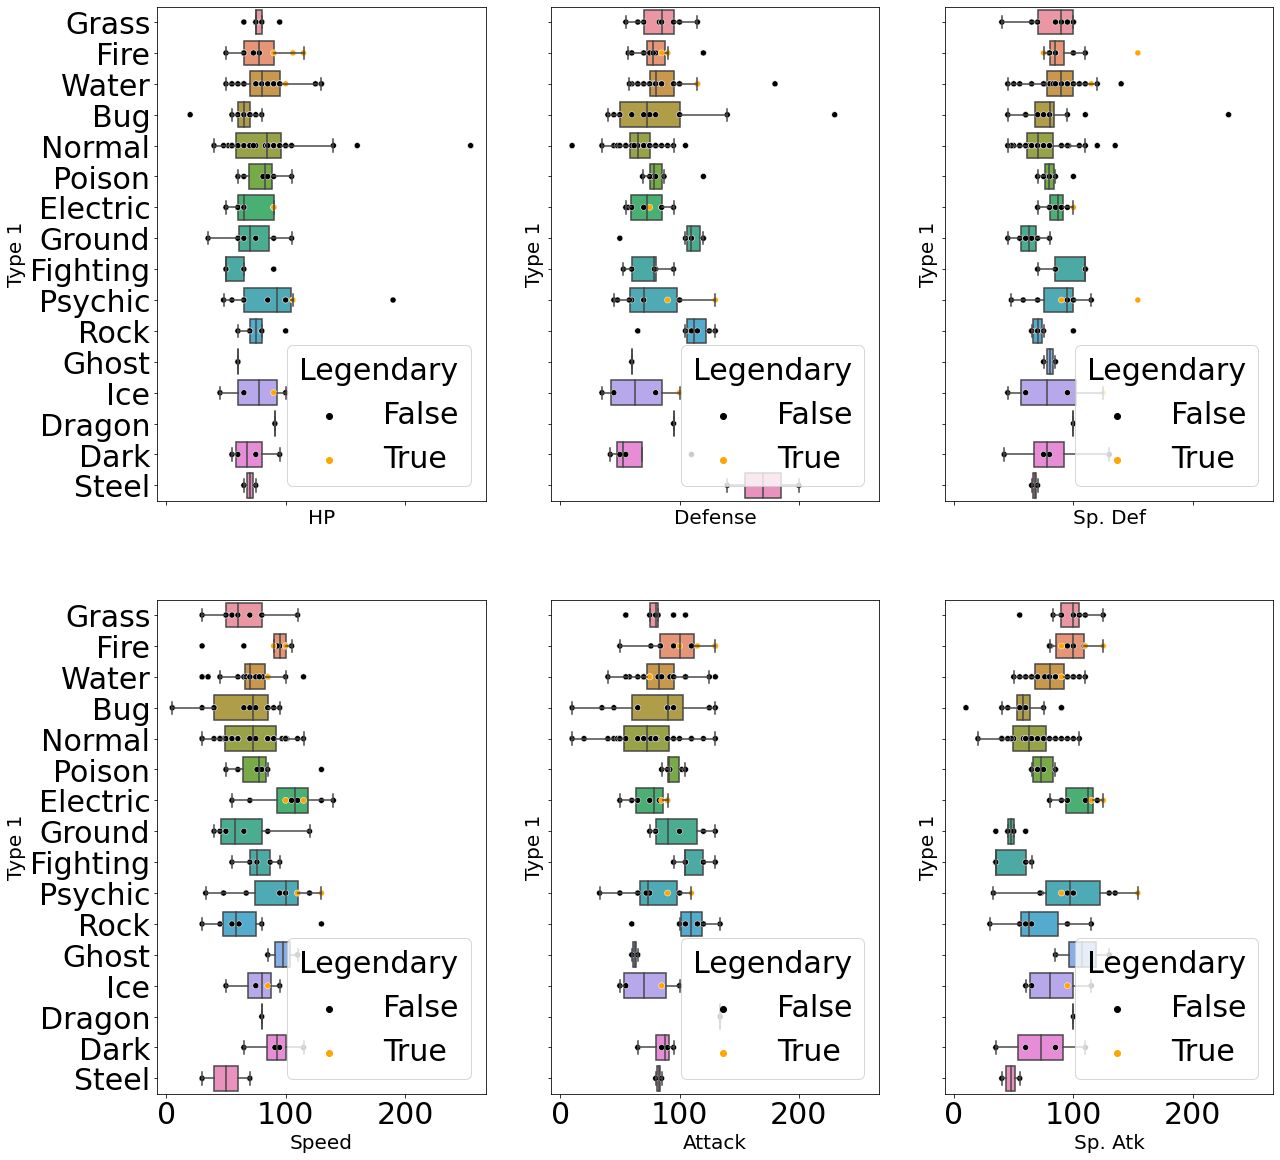

In [33]:
(f, axes) = attr_per_type(my_evolved_pokemon, ['HP','Defense','Sp. Def','Speed','Attack','Sp. Atk'], 'Legendary','Type 1')
plt.show()

In [ ]:
#Grafica ahora con el dataframe limpio
#<Completar>
#<Completar>

Estos son los Pokémon reales que podrían usarse en una batalla de Pokémon, ya que tener una evolución significa que tus estadísticas aumentarán y tendrás acceso a un grupo de movimientos más amplio. Ahora, sería interesante plotear las frecuencias de los Tipos 1 y 2 que tenemos en este data set.

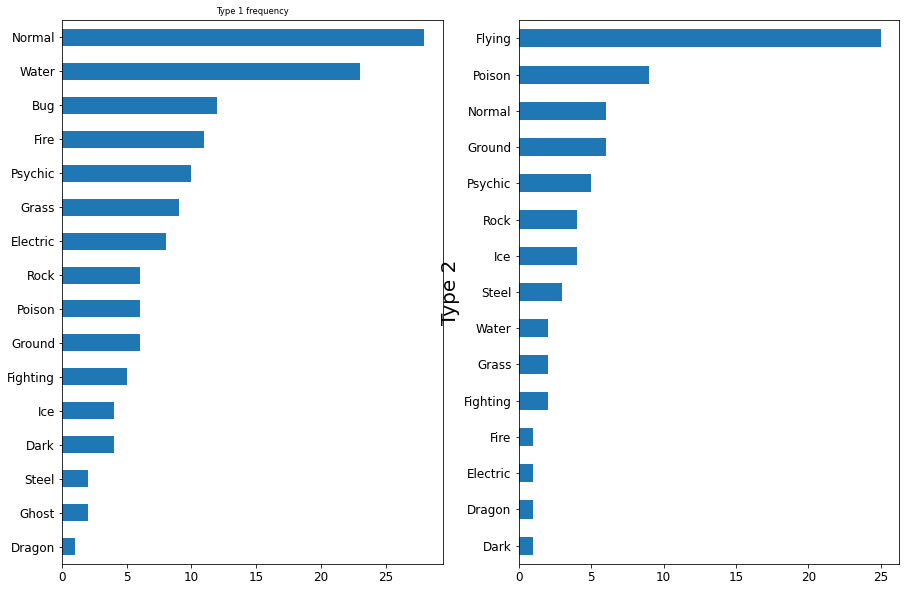

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
plt.rcParams["font.size"] = 7

ax1 = my_evolved_pokemon.groupby('Type 1').size().sort_values().plot(kind='barh', ax=ax1)
start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 5))
ax1.axes.get_yaxis().get_label().set_visible(False)
_ = ax1.set_title('Type 1 frequency')

# Lo mismo, pero para el Type 2
ax2 = my_evolved_pokemon.groupby('Type 2').size().sort_values().plot(kind='barh', ax=ax2)

Ahora, para fines didácticos realizaremos un heatmap haciendo un conteo de ambos, mostrando aquellas combinaciones de tipos

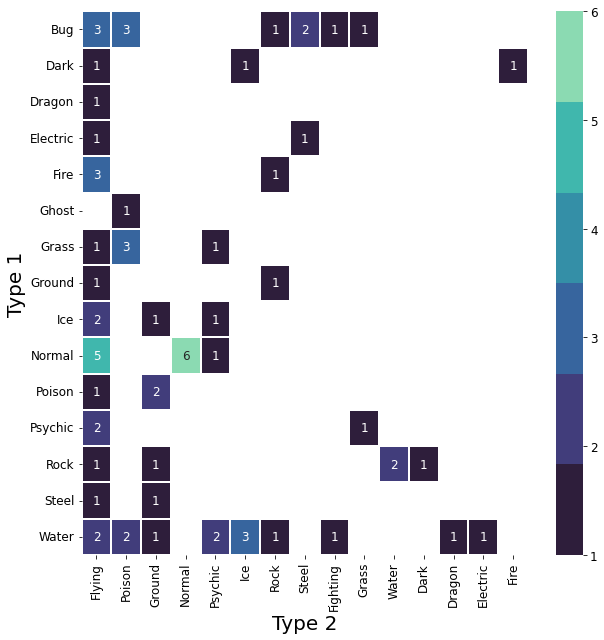

In [40]:
pivot_dat = my_evolved_pokemon.pivot_table(index=my_evolved_pokemon['Type 1'],
                                           columns=my_evolved_pokemon['Type 2'], 
                                               aggfunc = 'size')


pivot_dat = pivot_dat[pivot_dat.sum().sort_values(ascending = False).index] #Reordering
        
fig = plt.figure(figsize=(10, 10))    
plt.rcParams["font.size"] = 12
sns.heatmap(pivot_dat, 
            annot=True, 
            cmap=sns.color_palette('mako'), 
            cbar=True, 
            linewidths=0.3           )
plt.show()

## Nota del equipo: en nuestra pivot table llegamos a tener un valor de 6 que no tiene el código de ejemplo

Ahora, mostremos la distribución de los datos utilizando el método de displot

In [44]:
stats = my_evolved_pokemon.loc[:, 'HP':'Speed']
stats

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
2,80,82,83,100,100,80
6,78,84,78,109,85,100
11,79,83,100,85,105,78
15,60,45,50,90,80,70
18,65,90,40,45,80,75
...,...,...,...,...,...,...
264,100,75,115,90,115,85
267,100,134,110,95,100,61
269,106,90,130,90,154,110
270,106,130,90,110,154,90


In [56]:
type(stats)

pandas.core.frame.DataFrame

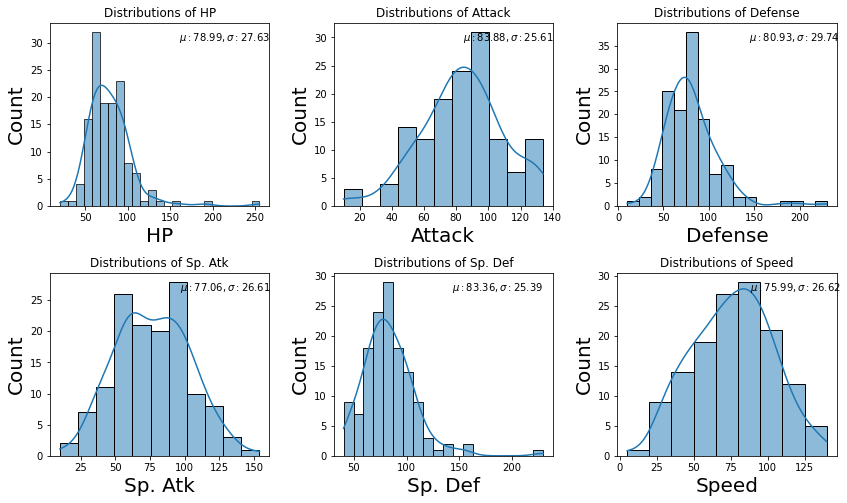

In [78]:
stats = my_evolved_pokemon.loc[:, 'HP':'Speed']
plt.figure(figsize=(12, 10))
plt.rcParams["font.size"] = 10

for ii, stat in enumerate(stats):
    title = "Distributions of {stat}".format(stat=stat)
    title = "Distributions of "+stat
    plt.subplot(3, 3, ii+1)
    plt.title(title)
    sns.histplot(stats[stat],kde=True)
    x = plt.gca().get_xlim()[1] * .6
    y = plt.gca().get_ylim()[1] * .9
    plt.text(x, y, '$\mu: {mu: .2f}, \sigma: {sigma: .2f}$'.format(mu = stats[stat].mean(), sigma=stats[stat].std()))
    
    
plt.tight_layout()
plt.show()
                                                                   

## Equipo: Aquí nos quedamos el sábado 11 de Marzo

# Modelos para saber si son o no legendarios

In [82]:
my_evolved_pokemon.Legendary.unique()

array([False,  True])

Vamos a realizar un descarte de columnas. 

Para X, solamente necesitaremos las columnas de características junto con su valor total (deberán ser 7 columnas)

Para Y, necesitamos la columna de legendarios ya que será nuestro objetivo.

In [182]:
#my_evolved_pokemon['points'] = 
#my_evolved_pokemon['points'] = my_evolved_pokemon.loc[:, 'HP':'Speed'].sum(axis=1)
#nuevas_cols = ["Name","Type 1","Type 2","Total","HP","Attack","Defense","Sp. Atk","Sp. Def","Speed","points","Generation","Legendary","Has_evol","Last_evol"]
my_evolved_pokemon=my_evolved_pokemon[nuevas_cols]
X = my_evolved_pokemon.loc[:, 'Total':'Speed']
y = my_evolved_pokemon.Legendary


Por primera ocasión, estaremos utilizando la librería de sklearn para auxiliarnos en hacer el split de datos

In [183]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y) # 80% y 20%

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102, 7) (35, 7) (102,) (35,)


Estaremos utilizando por primera vez, algunos modelos como son la regresión logística, las máquinas de soporte vectorial, árboles de decisión y bosque aleatorio

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF

alg1 = LogisticRegression()
alg2 = SVC(kernel = 'rbf') #lineal , polinomial, radial basis fuction (gaussiano)
alg3 = RF()
alg4 = DT()

Posteriormente, entrenaremos cada uno de los modelos.
Para obtener el valor del "Accuracy" (Exactitud), necesitamos comparar el valor original de ambos sets contra el valor predicho del algoritmo

In [185]:
from sklearn.metrics import accuracy_score
alg1.fit(X_train,y_train)
alg = alg1
print(type(alg))
pd.DataFrame({"Accuracy on Train":[accuracy_score(y_train,alg.predict(X_train))],"Accuracy on Test":[accuracy_score(y_test,alg.predict(X_test))]})

<class 'sklearn.linear_model._logistic.LogisticRegression'>


,Accuracy on Train,Accuracy on Test
0,0.960784,0.914286


In [186]:
alg2.fit(X_train,y_train)
alg = alg2
print(type(alg))
pd.DataFrame({"Accuracy on Train":[accuracy_score(y_train,alg.predict(X_train))],"Accuracy on Test":[accuracy_score(y_test,alg.predict(X_test))]})

<class 'sklearn.svm._classes.SVC'>


,Accuracy on Train,Accuracy on Test
0,0.970588,0.828571


In [187]:
alg3.fit(X_train,y_train)
alg = alg3
print(type(alg))
pd.DataFrame({"Accuracy on Train":[accuracy_score(y_train,alg.predict(X_train))],"Accuracy on Test":[accuracy_score(y_test,alg.predict(X_test))]})


<class 'sklearn.ensemble._forest.RandomForestClassifier'>


,Accuracy on Train,Accuracy on Test
0,1.0,0.857143


In [188]:
alg4.fit(X_train,y_train)
alg = alg4
print(type(alg))
pd.DataFrame({"Accuracy on Train":[accuracy_score(y_train,alg.predict(X_train))],"Accuracy on Test":[accuracy_score(y_test,alg.predict(X_test))]})


<class 'sklearn.tree._classes.DecisionTreeClassifier'>


,Accuracy on Train,Accuracy on Test
0,1.0,0.914286


Vamos a probar ahora nuestros modelos. Usaremos a estos ejemplos para observar si los modelos pueden realizar una buena predicción de si es o no un legendario. 

El siguiente ejemplo no debería ser clasificado como legendario...

In [168]:
#cols = list(my_evolved_pokemon)
#print(cols)
#cols.remove('points')
#cols.remove('Has_evol')
#cols.remove('Last_evol')
#print(cols)

In [189]:
#Completar
nonLegendary = pokemondf[pokemondf.Legendary==False]
#pokemondf[pokemondf.Legendary==False].head(10)
nonLegendary.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [309]:
nonLegendary.loc[:,'Total':'Speed'][nonLegendary.index==8].values

array([[634,  78, 104,  78, 159, 115, 100]])

In [310]:
# Completar
test = nonLegendary.loc[:,'Total':'Speed'][nonLegendary.index==8].values
test

array([[634,  78, 104,  78, 159, 115, 100]])

In [311]:
# Mandamos a llamar a los algoritmos con el np.array que obtuvimos 
# del registro en específico y sus caracteristicas correspondientes
alg1.predict(test)[0]

/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


True

In [312]:
alg2.predict(test)[0]

/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


False

In [313]:
alg3.predict(test)[0]

/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


False

In [314]:
alg4.predict(test)[0]

/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


False

### ¿Podrían tratar de dar una idea de porque en algunos casos los modelos se han equivocado?

## Respuesta del equipo:

Porque el conjunto de datos de entrenamiento es muy corto y los ejemplos no son tan variados

---
---

### Extender ejercicio para otras categorías usando pokedex_v2

Ahora, usaremos el archivo csv de pokedex_v2 para hacer otro pequeño ejercicio. La diferencia de este archivo es que tiene la columna de "status" con otras clasificaciones a diferencia de "Legendary" que solamente era True o False


In [210]:
#Lectura de datos
pokedexv2 = pd.read_csv("../../data/pokedex_v2.csv")
## Impresion de dimensiones
pokedexv2.shape

(1028, 13)

Del mismo modo, construiremos nuestros conjuntos X y Y para hacer un ejercicio con estos datos. Pero ahora, Y tendrá que ser otra variable objetivo

In [214]:
#Impresion de df
pokedexv2.head(4)

,pokedex_number,Name,type_1,type_2,total_points,hp,attack,defense,sp_attack,sp_defense,speed,generation,status
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,Normal
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,Normal
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,Normal
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,Normal


In [362]:
#Split de X y y
X2 = pokedexv2.loc[:,'total_points':'generation']
y2 = pokedexv2.status

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2) # 80% y 20%
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(771, 8) (257, 8) (771,) (257,)


In [217]:
#Imprimir y
y2

0          Normal
1          Normal
2          Normal
3          Normal
4          Normal
          ...    
1023    Legendary
1024    Legendary
1025    Legendary
1026    Legendary
1027    Legendary
Name: status, Length: 1028, dtype: object

Si realizamos un conteo de valores de la generacion con respecto al status, podremos apreciar algo interesante. Está completamente desbalanceado!


In [348]:
#Value counts de generación vs status


pokedexv2.groupby(['status','generation'])['generation'].size().unstack().reset_index()

# nota: muy similar a:
# pd.crosstab(index=pokedexv2.status,columns=pokedexv2.generation)


generation,status,1,2,3,4,5,6,7,8
0,Legendary,3.0,2.0,6.0,4.0,5.0,5.0,8.0,6.0
1,Mythical,1.0,1.0,5.0,6.0,6.0,5.0,5.0,NaN
2,Normal,185.0,101.0,147.0,105.0,151.0,75.0,69.0,82.0
3,Sub Legendary,3.0,3.0,7.0,6.0,9.0,NaN,17.0,NaN


Para este ejemplo, podríamos auxiliarnos un poco de una librería, dado que sí, efectivamente tenemos un poquito del desbalance de clases. 

Nos auxiliaremos de la librería [imbalanced-learn](https://imbalanced-learn.org/stable/user_guide.html#user-guide)

¿Qué es lo que hace esta librería?, en resumen, nos ayuda a muestrear. Como si fuera una especie de generador de números aleatorios (Monte Carlo)


In [ ]:
#!pip install imbalanced-learn
# instalado con conda install

Esto significa que si la clase mayoritaria tuviera 1000 ejemplos y la clase minoritaria 100, esta estrategia sobremuestrearía la clase minoritaria para que tenga 1000 ejemplos.


In [349]:
from imblearn.over_sampling import RandomOverSampler

In [350]:
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X2, y2)

Por ejemplo, un conjunto de datos con 1000 ejemplos en la clase mayoritaria y 100 ejemplos en la clase minoritaria se submuestreará de modo que ambas clases tengan 100 ejemplos en el conjunto de datos de entrenamiento transformado.


In [352]:
from imblearn.under_sampling import RandomUnderSampler

In [353]:
undersample = RandomUnderSampler(sampling_strategy='majority')

Luego, la transformación puede ajustarse y aplicarse a un conjunto de datos en un solo paso llamando a la función fit_resample () y pasando el conjunto de datos sin transformar como argumentos.


In [354]:
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X2, y2)

Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las diferencias en la precisión numérica. Considera ejecutar el ejemplo varias veces y compara el resultado promedio.

El modelo elegido y la configuración de remuestreo son arbitrarios, diseñados para proporcionar una plantilla que puede usar para probar el submuestreo con su conjunto de datos y algoritmo de aprendizaje en lugar de resolver de manera óptima el conjunto de datos sintéticos.

Ahora, vuelvan a entrenar los modelos con estos datasets y volvamos a repetir el ejercicio anterior.

1.- Entrenar los modelos para los conjuntos X y Y considerando la columna de status. Prueben nuevamente los datos que usamos en la parte superior para observar que resultado ahora nos arroja.

2.- Realizar lo mismo, pero ahora con los conjuntos _over

3.- Realizar lo mismo, pero ahora con los conjuntos _under

## DATOS ORIGINALES:

In [376]:
alg1 = LogisticRegression()
alg2 = SVC(kernel = 'rbf') #lineal , polinomial, radial basis fuction (gaussiano)
alg3 = RF()
alg4 = DT()

# con el set de datos original. el split ya se hizo más arriba pero lo repetimos aquí:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2) # 80% y 20%

alg1.fit(X2_train,y2_train)
alg = alg1
print(type(alg))
print(pd.DataFrame({"Accuracy on Train":[accuracy_score(y2_train,alg.predict(X2_train))],"Accuracy on Test":[accuracy_score(y2_test,alg.predict(X2_test))]}))
print()

alg2.fit(X2_train,y2_train)
alg = alg2
print(type(alg))
print(pd.DataFrame({"Accuracy on Train":[accuracy_score(y2_train,alg.predict(X2_train))],"Accuracy on Test":[accuracy_score(y2_test,alg.predict(X2_test))]}))
print()

alg3.fit(X2_train,y2_train)
alg = alg3
print(type(alg))
print(pd.DataFrame({"Accuracy on Train":[accuracy_score(y2_train,alg.predict(X2_train))],"Accuracy on Test":[accuracy_score(y2_test,alg.predict(X2_test))]}))
print()

alg4.fit(X2_train,y2_train)
alg = alg4
print(type(alg))
print(pd.DataFrame({"Accuracy on Train":[accuracy_score(y2_train,alg.predict(X2_train))],"Accuracy on Test":[accuracy_score(y2_test,alg.predict(X2_test))]}))
print()

test_index=8
test = pokedexv2.loc[:,'total_points':'generation'][pokedexv2.index==test_index].values
print(test,pokedexv2.iloc[test_index].status)

print('ALG1: predicted:',alg1.predict(test)[0], 'real:',pokedexv2.iloc[test_index].status)
print('ALG2: predicted:',alg2.predict(test)[0], 'real:',pokedexv2.iloc[test_index].status)
print('ALG3: predicted:',alg3.predict(test)[0], 'real:',pokedexv2.iloc[test_index].status)
print('ALG4: predicted:',alg4.predict(test)[0], 'real:',pokedexv2.iloc[test_index].status)


/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<class 'sklearn.linear_model._logistic.LogisticRegression'>
   Accuracy on Train  Accuracy on Test
0           0.892348           0.88716

<class 'sklearn.svm._classes.SVC'>
   Accuracy on Train  Accuracy on Test
0           0.920882          0.906615

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
   Accuracy on Train  Accuracy on Test
0                1.0          0.945525

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
   Accuracy on Train  Accuracy on Test
0                1.0          0.918288

[[634  78 104  78 159 115 100   1]] Normal
ALG1: predicted: Normal real: Normal
ALG2: predicted: Normal real: Normal
ALG3: predicted: Normal real: Normal
ALG4: predicted: Normal real: Normal


/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## DATOS SOBRE MUESTREADOS

In [382]:
alg1 = LogisticRegression()
alg2 = SVC(kernel = 'rbf') #lineal , polinomial, radial basis fuction (gaussiano)
alg3 = RF()
alg4 = DT()

X2_train, X2_test, y2_train, y2_test = train_test_split(X_over, y_over) # 80% y 20%

alg1.fit(X2_train,y2_train)
alg = alg1
print(type(alg))
print(pd.DataFrame({"Accuracy on Train":[accuracy_score(y2_train,alg.predict(X2_train))],"Accuracy on Test":[accuracy_score(y2_test,alg.predict(X2_test))]}))
print()

alg2.fit(X2_train,y2_train)
alg = alg2
print(type(alg))
print(pd.DataFrame({"Accuracy on Train":[accuracy_score(y2_train,alg.predict(X2_train))],"Accuracy on Test":[accuracy_score(y2_test,alg.predict(X2_test))]}))
print()

alg3.fit(X2_train,y2_train)
alg = alg3
print(type(alg))
print(pd.DataFrame({"Accuracy on Train":[accuracy_score(y2_train,alg.predict(X2_train))],"Accuracy on Test":[accuracy_score(y2_test,alg.predict(X2_test))]}))
print()

alg4.fit(X2_train,y2_train)
alg = alg4
print(type(alg))
print(pd.DataFrame({"Accuracy on Train":[accuracy_score(y2_train,alg.predict(X2_train))],"Accuracy on Test":[accuracy_score(y2_test,alg.predict(X2_test))]}))
print()

test_index=8
test = pokedexv2.loc[:,'total_points':'generation'][pokedexv2.index==test_index].values
print(test,pokedexv2.iloc[test_index].status)

print('ALG1: predicted:',alg1.predict(test)[0], 'real:',pokedexv2.iloc[test_index].status)
print('ALG2: predicted:',alg2.predict(test)[0], 'real:',pokedexv2.iloc[test_index].status)
print('ALG3: predicted:',alg3.predict(test)[0], 'real:',pokedexv2.iloc[test_index].status)
print('ALG4: predicted:',alg4.predict(test)[0], 'real:',pokedexv2.iloc[test_index].status)


/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<class 'sklearn.linear_model._logistic.LogisticRegression'>
   Accuracy on Train  Accuracy on Test
0           0.662021          0.680585

<class 'sklearn.svm._classes.SVC'>
   Accuracy on Train  Accuracy on Test
0           0.896167          0.895616

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
   Accuracy on Train  Accuracy on Test
0                1.0          0.979123

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
   Accuracy on Train  Accuracy on Test
0                1.0          0.968685

[[634  78 104  78 159 115 100   1]] Normal
ALG1: predicted: Mythical real: Normal
ALG2: predicted: Mythical real: Normal
ALG3: predicted: Normal real: Normal
ALG4: predicted: Normal real: Normal


/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## DATOS SUB MUESTREADOS

In [383]:
alg1 = LogisticRegression()
alg2 = SVC(kernel = 'rbf') #lineal , polinomial, radial basis fuction (gaussiano)
alg3 = RF()
alg4 = DT()

X2_train, X2_test, y2_train, y2_test = train_test_split(X_under, y_under) # 80% y 20%

alg1.fit(X2_train,y2_train)
alg = alg1
print(type(alg))
print(pd.DataFrame({"Accuracy on Train":[accuracy_score(y2_train,alg.predict(X2_train))],"Accuracy on Test":[accuracy_score(y2_test,alg.predict(X2_test))]}))
print()

alg2.fit(X2_train,y2_train)
alg = alg2
print(type(alg))
print(pd.DataFrame({"Accuracy on Train":[accuracy_score(y2_train,alg.predict(X2_train))],"Accuracy on Test":[accuracy_score(y2_test,alg.predict(X2_test))]}))
print()

alg3.fit(X2_train,y2_train)
alg = alg3
print(type(alg))
print(pd.DataFrame({"Accuracy on Train":[accuracy_score(y2_train,alg.predict(X2_train))],"Accuracy on Test":[accuracy_score(y2_test,alg.predict(X2_test))]}))
print()

alg4.fit(X2_train,y2_train)
alg = alg4
print(type(alg))
print(pd.DataFrame({"Accuracy on Train":[accuracy_score(y2_train,alg.predict(X2_train))],"Accuracy on Test":[accuracy_score(y2_test,alg.predict(X2_test))]}))
print()

test_index=8
test = pokedexv2.loc[:,'total_points':'generation'][pokedexv2.index==test_index].values
print(test,pokedexv2.iloc[test_index].status)

print('ALG1: predicted:',alg1.predict(test)[0], 'real:',pokedexv2.iloc[test_index].status)
print('ALG2: predicted:',alg2.predict(test)[0], 'real:',pokedexv2.iloc[test_index].status)
print('ALG3: predicted:',alg3.predict(test)[0], 'real:',pokedexv2.iloc[test_index].status)
print('ALG4: predicted:',alg4.predict(test)[0], 'real:',pokedexv2.iloc[test_index].status)


/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<class 'sklearn.linear_model._logistic.LogisticRegression'>
   Accuracy on Train  Accuracy on Test
0           0.490566          0.361111

<class 'sklearn.svm._classes.SVC'>
   Accuracy on Train  Accuracy on Test
0           0.688679          0.694444

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
   Accuracy on Train  Accuracy on Test
0                1.0          0.805556

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
   Accuracy on Train  Accuracy on Test
0                1.0          0.833333

[[634  78 104  78 159 115 100   1]] Normal
ALG1: predicted: Legendary real: Normal
ALG2: predicted: Sub Legendary real: Normal
ALG3: predicted: Sub Legendary real: Normal
ALG4: predicted: Mythical real: Normal


/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/mnt/LENG/dev/anaconda3/envs/training9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### ¿Mejoraron los resultados? Den una pequeña descripción de que fue lo que sucedió

## Respuesta
Los resultados no mejoraron en los casos de sobre ni submuestreos. Empeoraron mucho en el caso del submuestreo en especial para el algotimo LogisticRegression y el SVC.